## PS: 
> #### https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/problems/ 
> #### Predict The Power Generated By WindMill in Test Dataset
> #### **My Score: 97.36926 (TOP 10)**

### Windmills
![](http://images.all-free-download.com/images/graphiclarge/ecological_and_wind_power_02_hd_pictures_168735.jpg)

### Windmill Blade
![](http://d3hnfqimznafg0.cloudfront.net/images/Article_Images/ImageForArticle_1209_16178693882817558.jpg)

# WorkFlow
> #### 1. Merging Train & Test Data
> #### 2. Manipulation
> #### 3. Exploratory Data Analysis On Data
> #### 4. Data Imputation
> #### 5. One Hot Encoding Categorical Features
> #### 6. H2o + Auto-ML 

# Importing & Merging Train and Test Data

In [1]:
library(readr)
library(dplyr)

# Importing the Data

train = read_csv("../input/a-fine-windy-day-hackerearth-ml-challenge/train_data.csv")
paste("Train Dataset")
View(head(train,5))
paste("Summary for Train Dataset")
summary(train)

test = read_csv("../input/a-fine-windy-day-hackerearth-ml-challenge/test_data.csv")
paste("Test Dataset")
View(head(test,5))
paste("Summary for Test Dataset")
summary(test)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  tracking_id = col_character(),
  datetime = col_datetime(format = ""),
  turbine_status = col_character(),
  cloud_level = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "Train Dataset"

tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),⋯,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
WM_33725,2019-08-04 14:33:20,94.82002,-99.00000,41.72302,-0.9034229,82.41057,42.52302,2563.1245,76.66556,⋯,NA,239.8364,2730.311,42.08467,BA,Medium,2.217542,0.3140648,24.28169,6.766521
WM_698,2018-11-05 10:13:20,241.83273,27.76478,-99.00000,-99.0000000,44.10492,46.25887,2372.3841,78.12980,⋯,NA,337.9447,1780.207,107.88864,A2,Medium,4.210346,0.4484944,27.26214,5.966275
WM_39146,2019-09-14 14:03:20,95.48472,NA,41.85547,12.6527635,42.32210,42.87855,1657.1696,67.65447,⋯,45.03320,227.8503,1666.050,-42.93146,ABC,Medium,2.719475,0.3023210,27.36613,2.874342
WM_6757,2018-12-25 15:33:20,238.81942,-99.00000,45.44391,15.1153228,44.75964,47.28210,2888.1341,95.38997,⋯,44.82715,492.0815,1964.503,42.74460,ABC,NA,4.857385,0.3671399,24.28777,14.851089
WM_21521,2019-05-04 03:13:20,10.72289,NA,41.98118,1.7156961,-17.61646,43.46985,781.6954,37.42307,⋯,-99.00000,259.2746,1177.516,13.38729,AAA,Medium,NA,0.4533737,27.97165,3.519074


[1] "Summary for Train Dataset"

 tracking_id           datetime                   wind_speed(m/s)  
 Length:28200       Min.   :2018-10-28 20:53:20   Min.   :-496.21  
 Class :character   1st Qu.:2019-01-18 11:15:50   1st Qu.:  20.88  
 Mode  :character   Median :2019-04-22 13:18:20   Median :  93.30  
                    Mean   :2019-04-14 15:48:53   Mean   :  69.04  
                    3rd Qu.:2019-07-08 00:45:50   3rd Qu.:  95.27  
                    Max.   :2019-09-23 06:33:20   Max.   : 601.46  
                                                  NA's   :273      
 atmospheric_temperature(°C) shaft_temperature(°C) blades_angle(°)    
 Min.   :-99.000             Min.   :-99.00        Min.   :-146.2595  
 1st Qu.:  7.949             1st Qu.: 41.63        1st Qu.:  -1.1977  
 Median : 16.102             Median : 43.69        Median :  -0.4956  
 Mean   :  0.384             Mean   : 40.09        Mean   :  -9.6540  
 3rd Qu.: 23.687             3rd Qu.: 45.67        3rd Qu.:   5.4950  
 Max.   : 80.217             M


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  tracking_id = col_character(),
  datetime = col_datetime(format = ""),
  turbine_status = col_character(),
  cloud_level = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "Test Dataset"

tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),⋯,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
WM_19817,2019-04-17 08:53:20,94.32427,17.64119,89.71419,51.146788,40.46056,39.59473,1073.2027,66.83004,⋯,24.00481,43.75669,445.9770,1664.222,21.91224,BA,Medium,3.185837,0.4039655,25.57243
WM_18723,2019-03-30 07:43:20,10.08887,13.97812,43.27285,46.516394,40.02779,41.17686,517.4364,37.28416,⋯,29.43181,42.72817,499.5953,1165.112,-35.05009,A,Medium,3.016603,0.4447555,24.37182
WM_34552,2019-08-10 11:33:20,347.15209,31.42303,41.07664,26.931602,43.10912,43.43956,1480.7165,70.01076,⋯,29.92424,43.25612,245.4322,1667.720,27.19530,B2,Medium,2.611941,0.3873681,27.65468
WM_28570,2019-06-26 03:53:20,24.47200,-99.00000,14.37508,66.513953,13.74125,15.57747,887.9795,41.44526,⋯,23.88643,13.50160,NA,1329.745,15.24576,BBB,Low,2.866805,0.4504777,24.18943
WM_36934,2019-08-27 16:43:20,96.99703,33.28184,41.40519,1.843112,121.57291,43.93459,2053.9164,68.00779,⋯,35.90689,-99.00000,442.4257,691.409,34.25702,A,Low,3.549672,0.3683548,4.88544


[1] "Summary for Test Dataset"

 tracking_id           datetime                   wind_speed(m/s)  
 Length:12086       Min.   :2018-10-28 21:13:20   Min.   :-525.53  
 Class :character   1st Qu.:2019-01-18 04:48:20   1st Qu.:  21.81  
 Mode  :character   Median :2019-04-19 22:13:20   Median :  93.34  
                    Mean   :2019-04-14 04:06:58   Mean   :  69.38  
                    3rd Qu.:2019-07-07 22:30:50   3rd Qu.:  95.25  
                    Max.   :2019-09-23 05:53:20   Max.   : 525.43  
                                                  NA's   :126      
 atmospheric_temperature(°C) shaft_temperature(°C) blades_angle(°)   
 Min.   :-99.0000            Min.   :-99.00        Min.   :-99.0000  
 1st Qu.:  8.1182            1st Qu.: 41.64        1st Qu.: -1.1918  
 Median : 16.1772            Median : 43.71        Median : -0.4971  
 Mean   :  0.6874            Mean   : 39.94        Mean   : -9.2185  
 3rd Qu.: 23.8551            3rd Qu.: 45.76        3rd Qu.:  6.2323  
 Max.   : 80.4422            Max.   

# Data Cleaning & Manipulation 

In [2]:
data_manipulation = function(train,test)
{
  # Removing the target variable from train data
  x = train$`windmill_generated_power(kW/h)`
  train = train[-22]
  
  # Checking number of columns in train and test data
          # print(ncol(train)==ncol(test)) : This returns TRUE
  # Since the number of columns is same in both train and test data we merge the both data using row-binding
  data = rbind(train,test)
  
  # Merging Target column from train with test(creating 12086 Null records for target feature)
  y = replace(c(numeric(0), 1:12086),1:12086, NA)
  windmill_generated_power = append (x,y)

  # Merging Target column with merged data
  data = cbind(data,windmill_generated_power)
  
  # Changing column names for betterment
  name_change = function(df,name){
    for(i in 1:22)
      colnames(df)[i] = name[i]
    return(df)
  }
  names = c("tracking_id","datetime","wind_speed","atmospheric_temperature","shaft_temperature","blades_angle","gearbox_temperature",
            "engine_temperature","motor_torque","generator_temperature","atmospheric_pressure","area_temperature",
            "windmill_body_temperature","wind_direction","resistance","rotor_torque","turbine_status","cloud_level",
            "blade_length","blade_breadth","windmill_height","windmill_generated_power")
  data = name_change(data,names)
  
  # Splitting Datetime Column & Time column
  data$Date = as.Date(data$datetime)
  data$Time = format(data$datetime,"%H:%M:%S")
  
  # Splitting Time into hours, mins & seconds
  df_time = data.frame(do.call(rbind,strsplit(data$Time, split = ":", fixed = TRUE)))
  names(df_time)[names(df_time)=="X1"] = "hours"
  names(df_time)[names(df_time)=="X2"] = "mins"
  names(df_time)[names(df_time)=="X3"] = "sec"
  
  # Splitting Date into year, month & day
  datetxt = as.Date(data$Date)
  df_date = data.frame(year = as.numeric(format(datetxt, format = "%Y")),
    month = as.numeric(format(datetxt, format = "%m")),
    day = as.numeric(format(datetxt, format = "%d")))
  
  # Merging created columns to original data
  data = cbind(data,df_date,df_time)
  data1 = select(data,-datetime,-Date,-Time)

  # Converting character variables to factors
  to_factor = function(df,cols){
    for(i in cols)
        df[,c(i)] = as.factor(df[,c(i)])
    return(df)
  }
    
  # Selecting columns index number that want to convert to factor
  cols = c(16,17,22:27)
  data1 = to_factor(data1,cols)
  
  return(data1)
}

data = data_manipulation(train,test)

#### Data After Manipulation

In [3]:
paste("Summary for Merged Data ")
summary(data)
paste("Merged Data")
View(head(data))
glimpse(data)

[1] "Summary for Merged Data "

 tracking_id          wind_speed      atmospheric_temperature shaft_temperature
 Length:40286       Min.   :-525.53   Min.   :-99.000         Min.   :-99.00   
 Class :character   1st Qu.:  21.19   1st Qu.:  8.008         1st Qu.: 41.63   
 Mode  :character   Median :  93.31   Median : 16.132         Median : 43.69   
                    Mean   :  69.14   Mean   :  0.475         Mean   : 40.04   
                    3rd Qu.:  95.26   3rd Qu.: 23.750         3rd Qu.: 45.70   
                    Max.   : 601.46   Max.   : 80.442         Max.   :183.30   
                    NA's   :399       NA's   :4877            NA's   :3        
  blades_angle       gearbox_temperature engine_temperature  motor_torque   
 Min.   :-146.2595   Min.   :-244.97     Min.   :-5.00      Min.   : 500.0  
 1st Qu.:  -1.1957   1st Qu.:  40.53     1st Qu.:41.92      1st Qu.: 871.5  
 Median :  -0.4965   Median :  43.22     Median :43.54      Median :2032.0  
 Mean   :  -9.5235   Mean   :  40.81     Mean   :42.

[1] "Merged Data"

,tracking_id,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,⋯,blade_length,blade_breadth,windmill_height,windmill_generated_power,year,month,day,hours,mins,sec
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,WM_33725,94.82002,-99.00000,41.72302,-0.9034229,82.41057,42.52302,2563.1245,76.66556,103402.96,⋯,2.217542,0.3140648,24.28169,6.766521,2019,8,4,14,33,20
2,WM_698,241.83273,27.76478,-99.00000,-99.0000000,44.10492,46.25887,2372.3841,78.12980,17030.90,⋯,4.210346,0.4484944,27.26214,5.966275,2018,11,5,10,13,20
3,WM_39146,95.48472,NA,41.85547,12.6527635,42.32210,42.87855,1657.1696,67.65447,16125.93,⋯,2.719475,0.3023210,27.36613,2.874342,2019,9,14,14,03,20
4,WM_6757,238.81942,-99.00000,45.44391,15.1153228,44.75964,47.28210,2888.1341,95.38997,18689.73,⋯,4.857385,0.3671399,24.28777,14.851089,2018,12,25,15,33,20
5,WM_21521,10.72289,NA,41.98118,1.7156961,-17.61646,43.46985,781.6954,37.42307,114468.17,⋯,NA,0.4533737,27.97165,3.519074,2019,5,4,03,13,20
6,WM_17873,93.76997,30.32623,17.97062,-99.0000000,43.81643,40.81579,2119.3517,72.34513,NA,⋯,2.504098,0.3956420,24.67329,4.945780,2019,3,22,21,03,20


Rows: 40,286
Columns: 27
$ tracking_id               <chr> "WM_33725", "WM_698", "WM_39146", "WM_6757",…
$ wind_speed                <dbl> 94.82002, 241.83273, 95.48472, 238.81942, 10…
$ atmospheric_temperature   <dbl> -99.00000, 27.76478, NA, -99.00000, NA, 30.3…
$ shaft_temperature         <dbl> 41.723019, -99.000000, 41.855473, 45.443914,…
$ blades_angle              <dbl> -0.90342290, -99.00000000, 12.65276348, 15.1…
$ gearbox_temperature       <dbl> 82.41057, 44.10492, 42.32210, 44.75964, -17.…
$ engine_temperature        <dbl> 42.52302, 46.25887, 42.87855, 47.28210, 43.4…
$ motor_torque              <dbl> 2563.1245, 2372.3841, 1657.1696, 2888.1341, …
$ generator_temperature     <dbl> 76.66556, 78.12980, 67.65447, 95.38997, 37.4…
$ atmospheric_pressure      <dbl> 103402.96, 17030.90, 16125.93, 18689.73, 114…
$ area_temperature          <dbl> 26.89787, 39.80147, 36.11606, 46.02005, 34.5…
$ windmill_body_temperature <dbl> NA, NA, 45.03320, 44.82715, -99.00000, 101.3…
$ wind_directio

# EDA

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




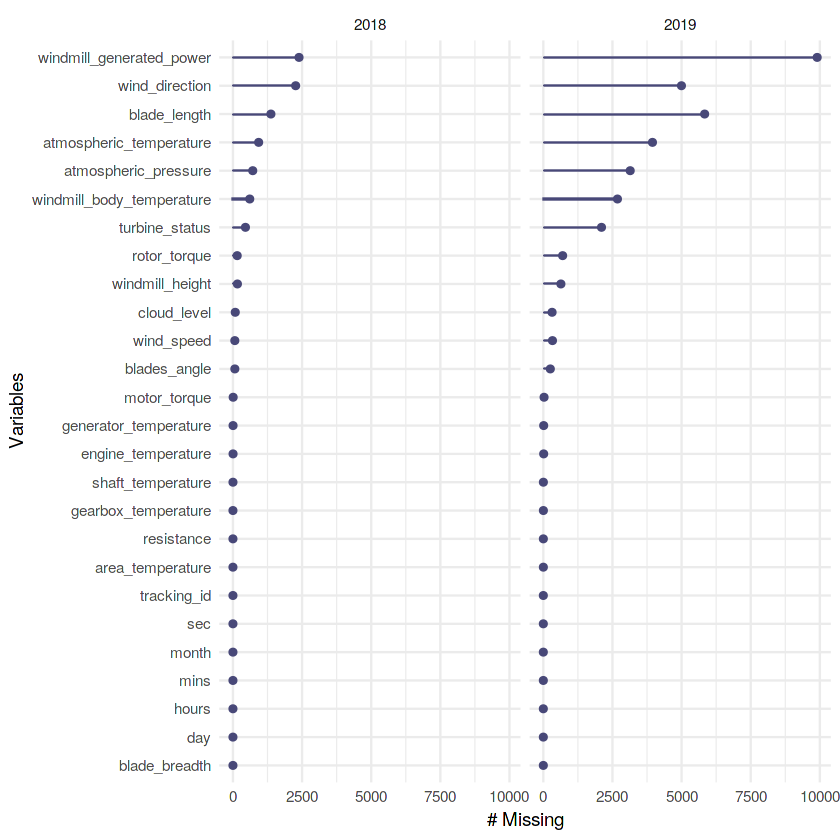

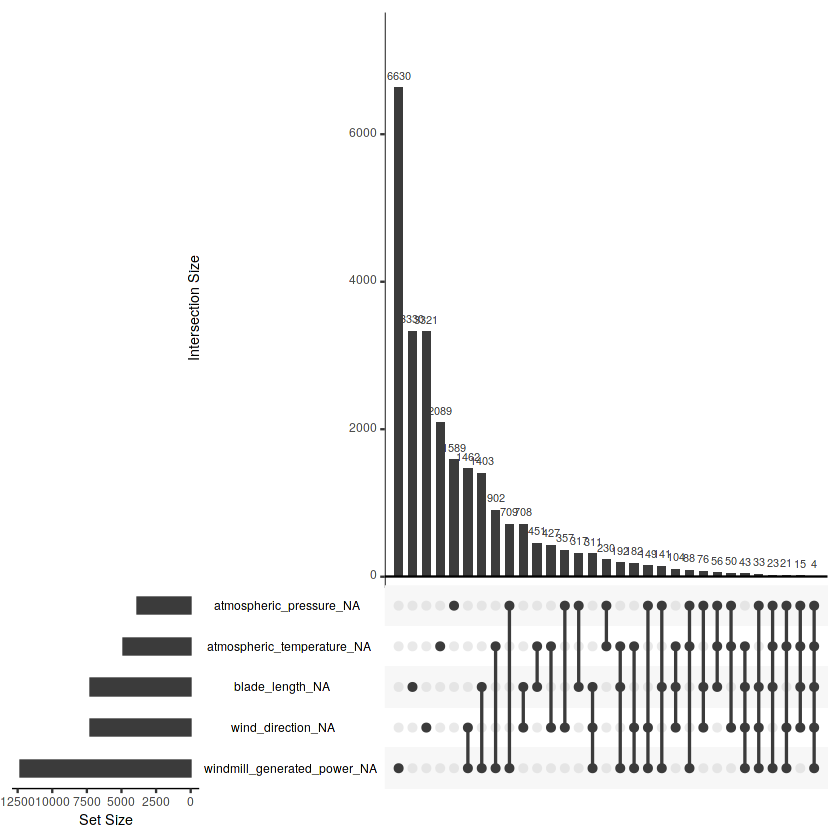

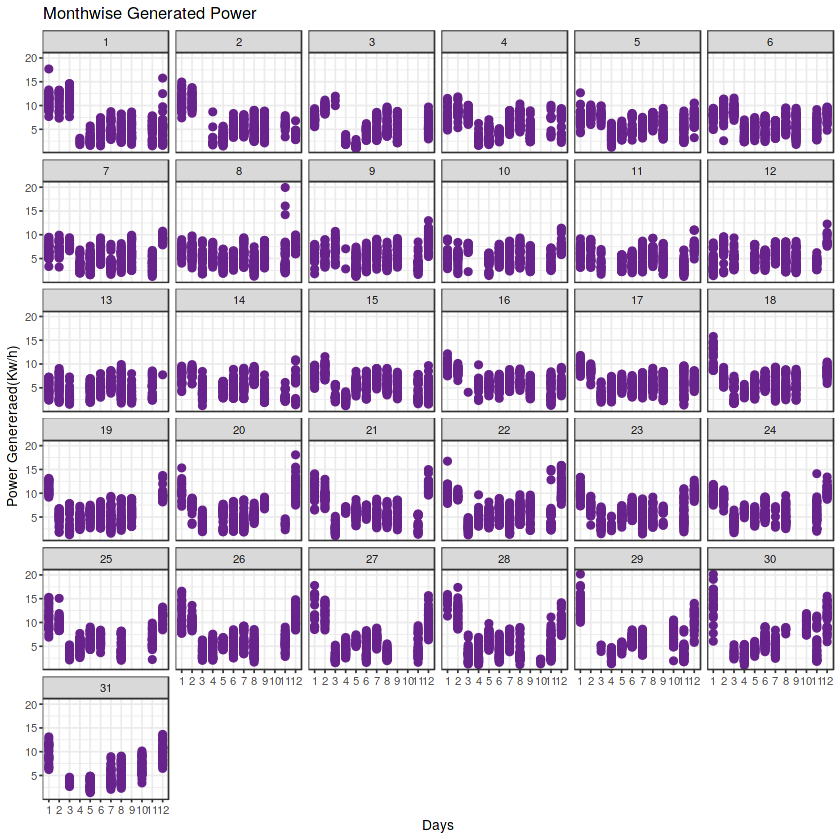

[1] "We observe on day 29 & day 30 of first month(Jan) max power is generated"

funModeling v.1.9.3 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai



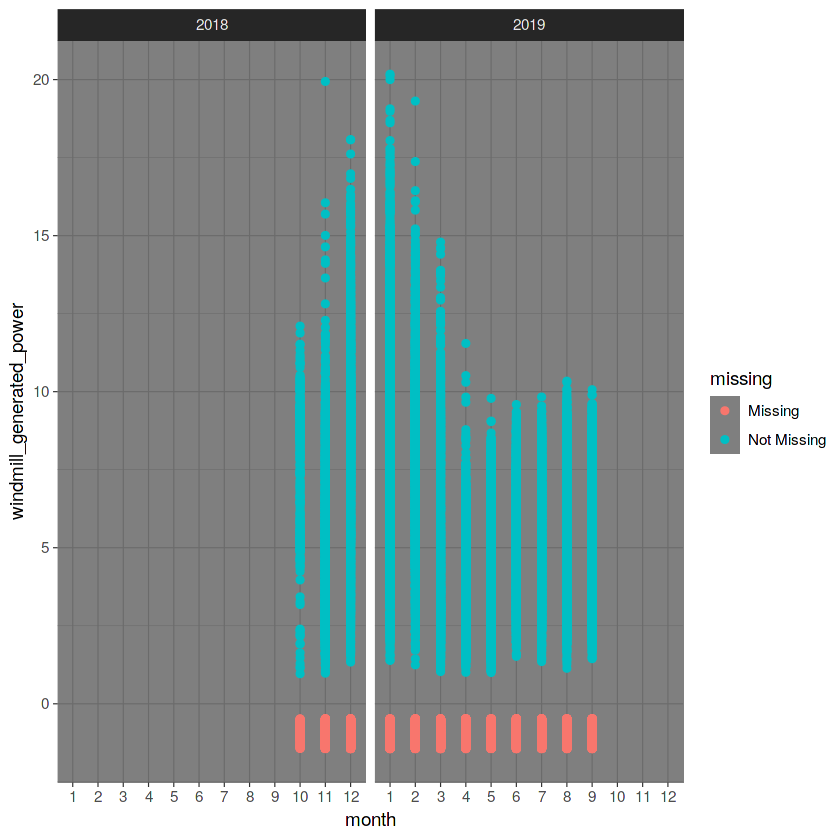

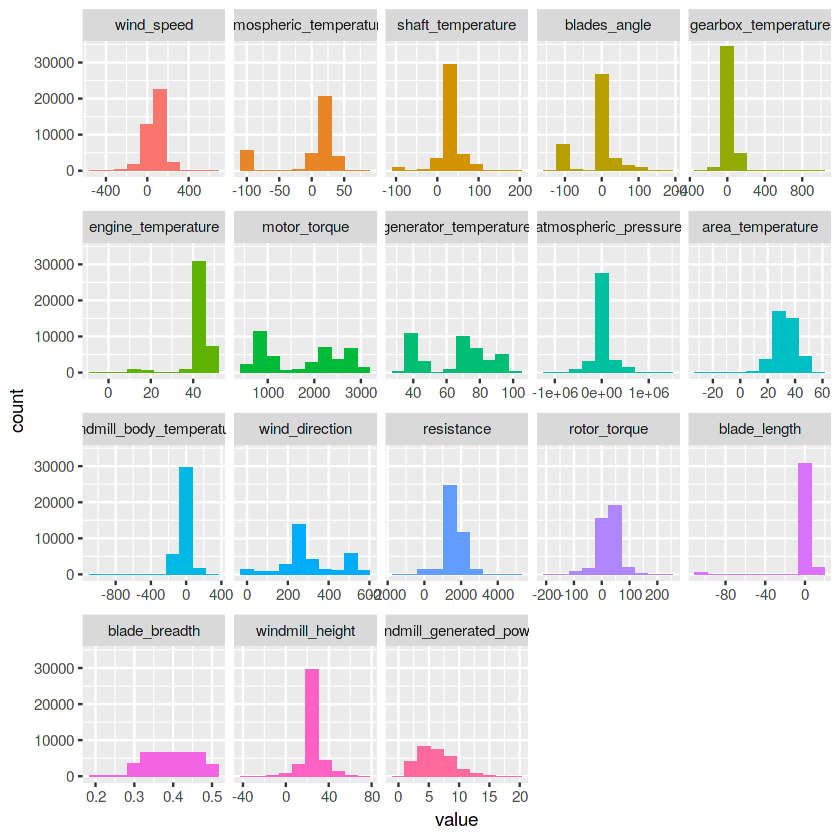

   turbine_status frequency percentage cumulative_perc
1              BB      2817       6.99            6.99
2              B2      2790       6.93           13.92
3               A      2782       6.91           20.83
4             BCB      2744       6.81           27.64
5             AAA      2712       6.73           34.37
6               D      2708       6.72           41.09
7              AB      2672       6.63           47.72
8              BA      2663       6.61           54.33
9             ABC      2654       6.59           60.92
10             A2      2651       6.58           67.50
11              B      2645       6.57           74.07
12            BBB      2634       6.54           80.61
13             BD      2630       6.53           87.14
14             AC      2628       6.52           93.66
15           <NA>      2556       6.34          100.00



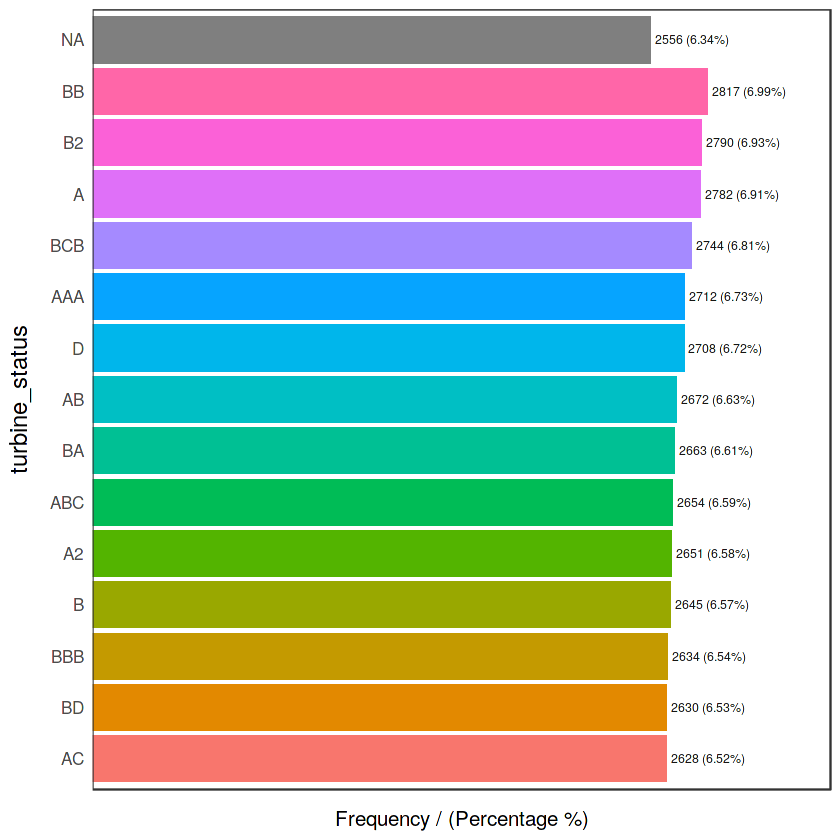

    cloud_level frequency percentage cumulative_perc
1           Low     19853      49.28           49.28
2        Medium     19597      48.64           97.92
3 Extremely Low       435       1.08           99.00
4          <NA>       401       1.00          100.00



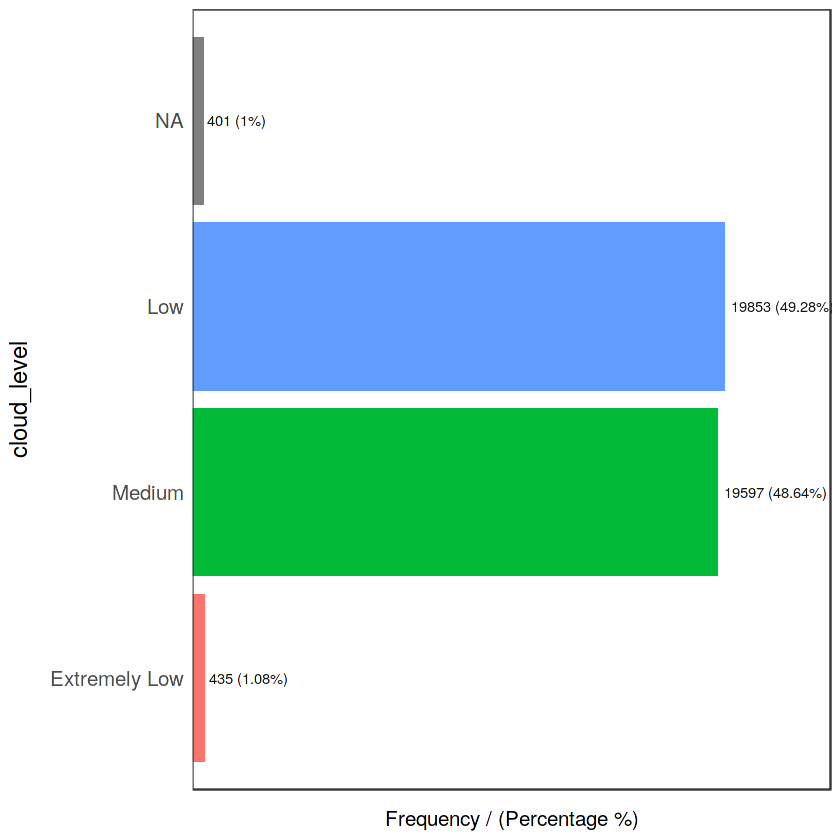

  year frequency percentage cumulative_perc
1 2019     32629      80.99           80.99
2 2018      7657      19.01          100.00



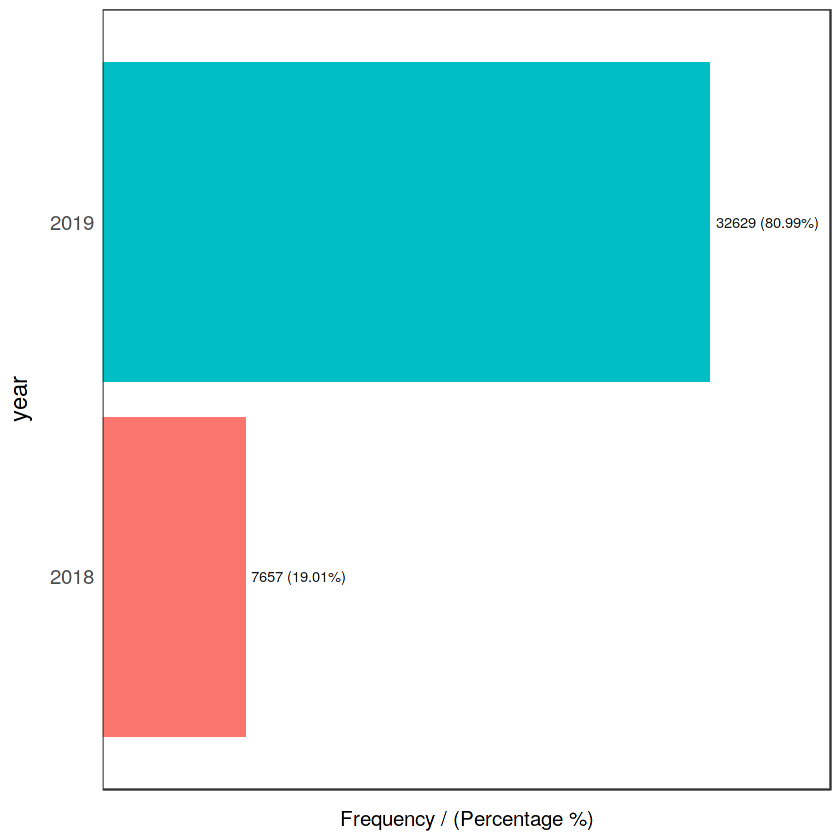

   month frequency percentage cumulative_perc
1      1      4118      10.22           10.22
2      5      4104      10.19           20.41
3      8      4045      10.04           30.45
4      7      3986       9.89           40.34
5     12      3971       9.86           50.20
6      6      3950       9.80           60.00
7      2      3783       9.39           69.39
8     11      3289       8.16           77.55
9      3      3241       8.04           85.59
10     9      3023       7.50           93.09
11     4      2379       5.91           99.00
12    10       397       0.99          100.00



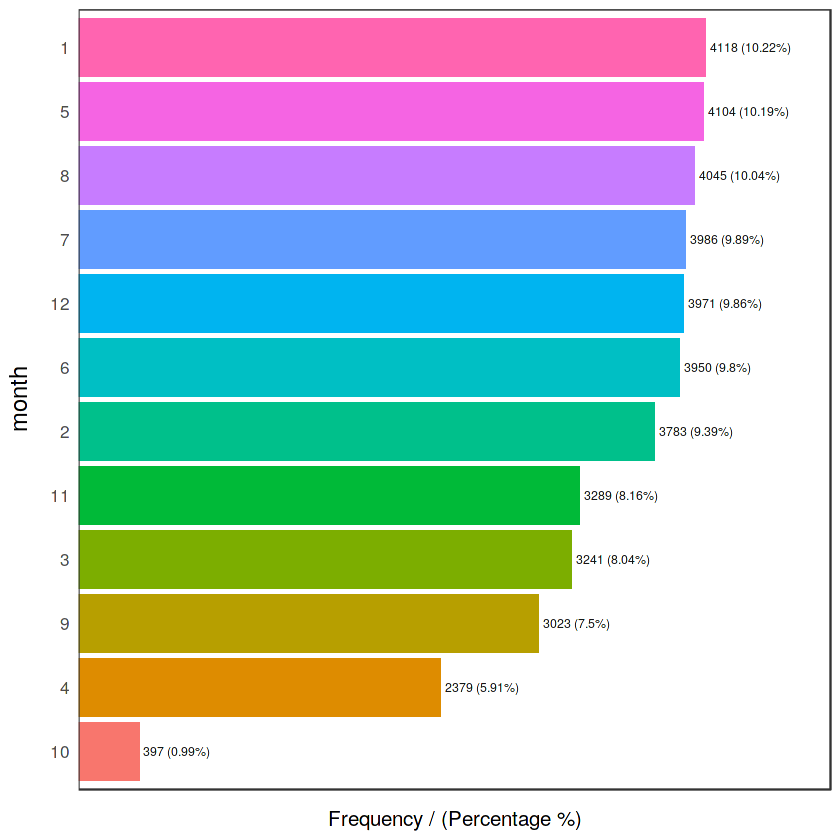

   day frequency percentage cumulative_perc
1    7      1520       3.77            3.77
2    6      1504       3.73            7.50
3    8      1488       3.69           11.19
4    5      1487       3.69           14.88
5   22      1487       3.69           18.57
6   17      1484       3.68           22.25
7   15      1451       3.60           25.85
8    1      1412       3.50           29.35
9   19      1379       3.42           32.77
10   4      1342       3.33           36.10
11  11      1320       3.28           39.38
12   9      1315       3.26           42.64
13  12      1315       3.26           45.90
14  26      1314       3.26           49.16
15  14      1313       3.26           52.42
16  21      1306       3.24           55.66
17  10      1283       3.18           58.84
18  18      1283       3.18           62.02
19  23      1280       3.18           65.20
20  27      1260       3.13           68.33
21  16      1250       3.10           71.43
22  25      1243       3.09     

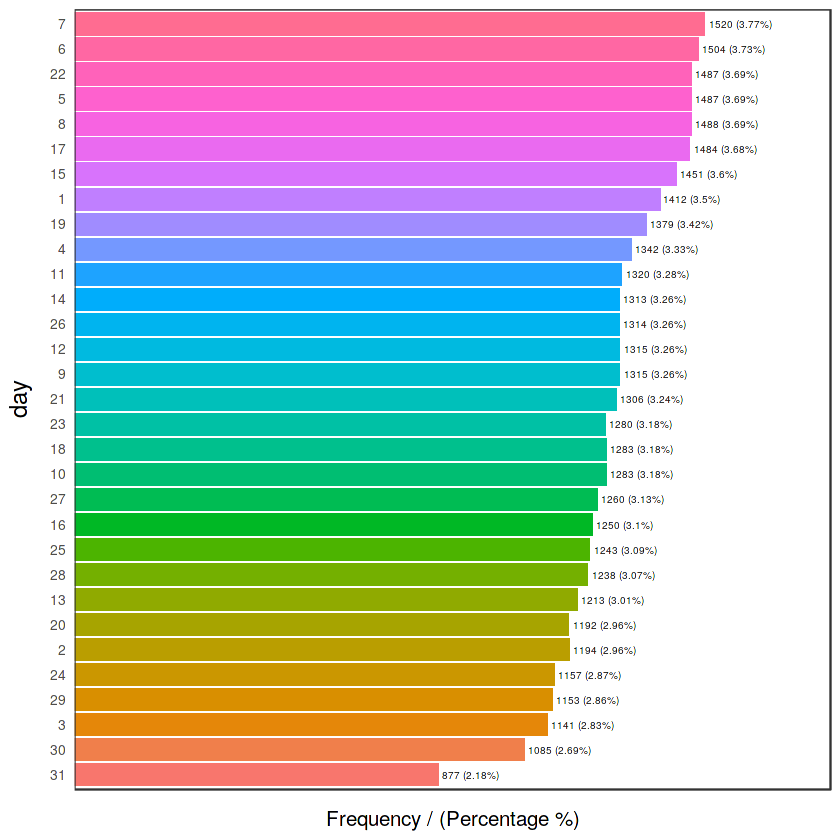

   hours frequency percentage cumulative_perc
1     20      1732       4.30            4.30
2     19      1726       4.28            8.58
3     18      1718       4.26           12.84
4     16      1715       4.26           17.10
5     12      1699       4.22           21.32
6     17      1698       4.21           25.53
7     22      1695       4.21           29.74
8     13      1694       4.20           33.94
9     09      1691       4.20           38.14
10    21      1690       4.20           42.34
11    23      1687       4.19           46.53
12    14      1685       4.18           50.71
13    15      1684       4.18           54.89
14    02      1682       4.18           59.07
15    10      1682       4.18           63.25
16    11      1677       4.16           67.41
17    01      1668       4.14           71.55
18    00      1661       4.12           75.67
19    04      1659       4.12           79.79
20    03      1652       4.10           83.89
21    08      1652       4.10     

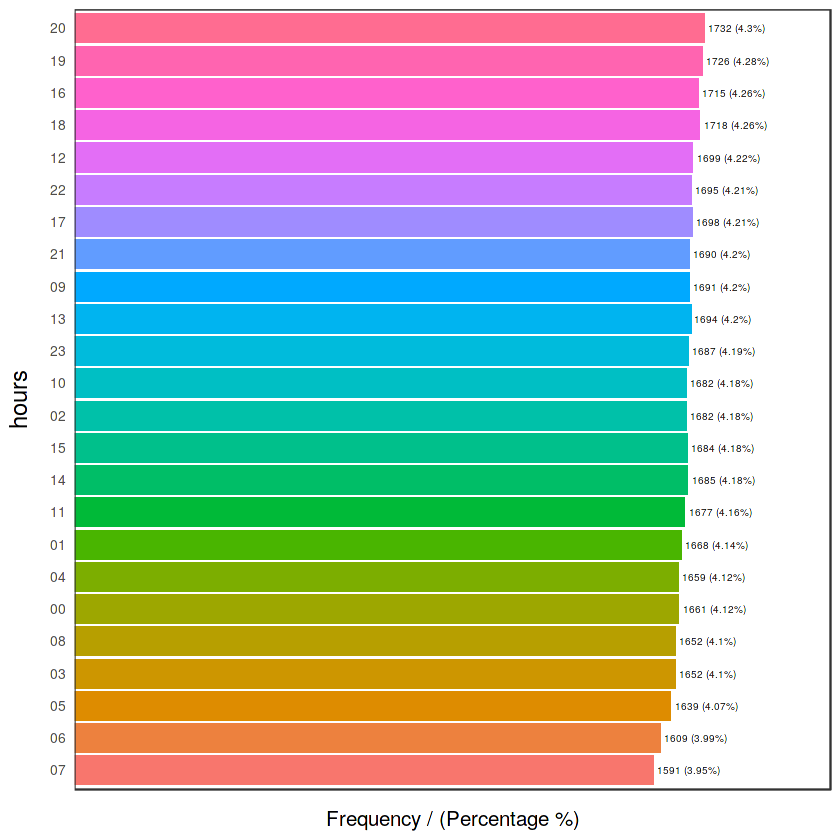

  mins frequency percentage cumulative_perc
1   33      6741      16.73           16.73
2   03      6724      16.69           33.42
3   13      6721      16.68           50.10
4   43      6718      16.68           66.78
5   53      6715      16.67           83.45
6   23      6667      16.55          100.00



[1] "Variables processed: turbine_status, cloud_level, year, month, day, hours, mins"

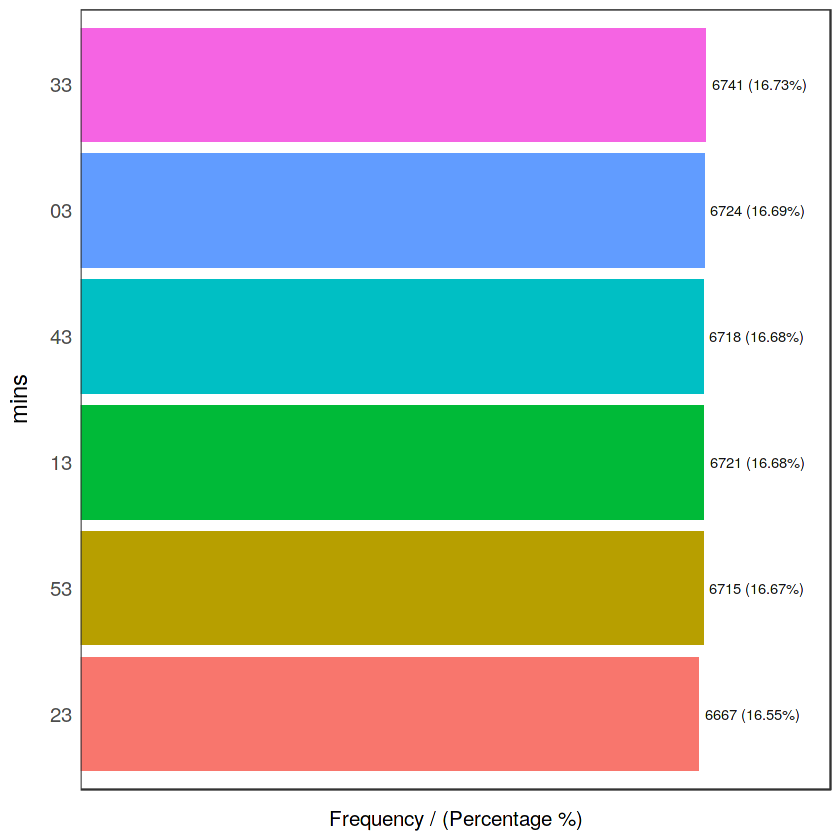

In [4]:
library(visdat)
library(ggplot2)
library(naniar)
library(Hmisc)
library(lattice)
options(warn=-1)

# 1. Time Series analysis w.r.t Target Variable: Power Generated

gg_miss_var(data,facet = year)

gg_miss_upset(data)

na.omit(data) %>%
  ggplot(aes(x = month, y = windmill_generated_power)) +
  geom_point(color = "darkorchid4") +
  labs(title = "Monthwise Generated Power",
       y = "Power Genereraed(Kw/h)",
       x = "Days") + theme_bw(base_size = 8) + facet_wrap(~day) 

#Checking missing value in power generated pattern based on month
data %>%
  ggplot(aes(x = month,y = windmill_generated_power)) + 
  geom_miss_point() + 
  facet_wrap(~year) + 
  theme_dark()
paste("We observe on day 29 & day 30 of first month(Jan) max power is generated")

# 2. Analysing all the Numeric Variables

library(funModeling) 
plot_num(data)

# 3. Analysing Categorical Variables except tracking_id and seconds

freq(data[,c(-1,-27)])

##### From these graph we see many outliers, i've tried removing some but it affected the ML model
##### This happened bcz maybe the data is not real
##### So here i wont be eliminating the outliers

# Data Imputation

Loading required package: colorspace

Loading required package: grid

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.


Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep





 Variables sorted by number of missings: 
                  Variable        Count
  windmill_generated_power 3.051432e-01
            wind_direction 1.802860e-01
              blade_length 1.788959e-01
   atmospheric_temperature 1.210594e-01
      atmospheric_pressure 9.576528e-02
 windmill_body_temperature 8.164126e-02
            turbine_status 6.344636e-02
              rotor_torque 2.117361e-02
           windmill_height 1.980837e-02
               cloud_level 9.953830e-03
                wind_speed 9.904185e-03
              blades_angle 7.992851e-03
              motor_torque 8.687882e-04
        engine_temperature 4.219828e-04
     generator_temperature 4.219828e-04
         shaft_temperature 7.446756e-05
       gearbox_temperature 4.964504e-05
          area_temperature 2.482252e-05
                resistance 2.482252e-05
               tracking_id 0.000000e+00
             blade_breadth 0.000000e+00
                      year 0.000000e+00
                     month 0.000000e+

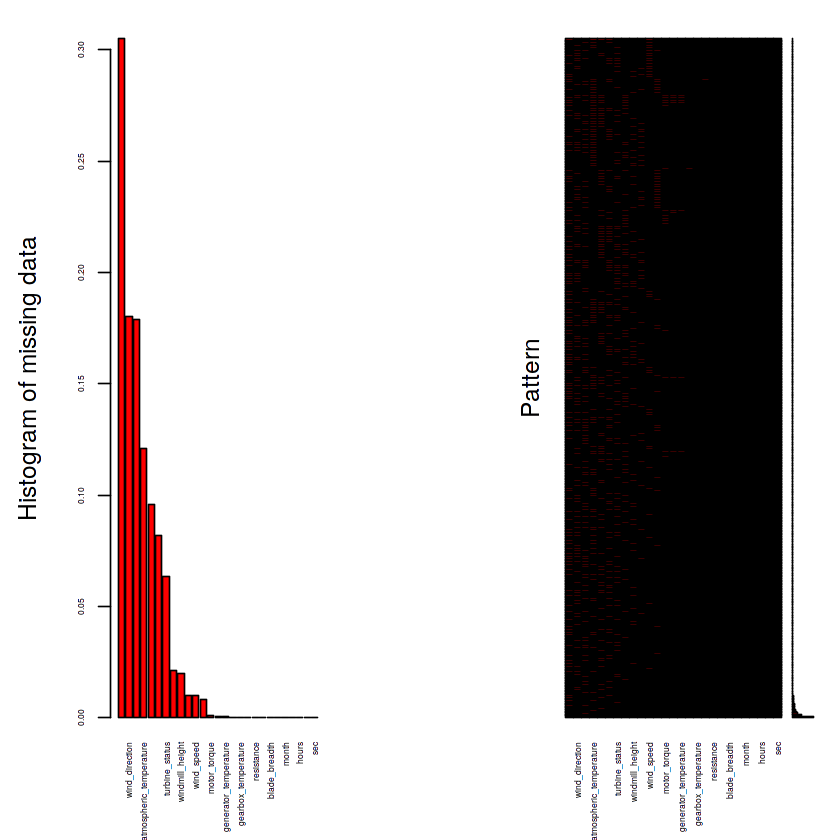

In [5]:
library(VIM)

# Missing Values Pattern
aggr_plot <- aggr(data, col=c('black','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=0.4, gap=10, ylab=c("Histogram of missing data","Pattern"))

In [6]:
library(mice)
data_imputation = function(data)
{
  # Imputing Numeric missing data using MICE stochastic regression imputation
  library(mice)
  imp = mice(data[,c(-1,-16,-17,-21:-27)], method = "norm.nob", m = 5, maxit = 5)
  data1 = complete(imp,2)
  densityplot(imp) 
  print("Blue is observed v/s Magenta is imputed")
  
  # Filling missing values in categorical variables using KNN imputer
  library(VIM)
  imp2 = kNN(data[,c(16,17)])
  data2 = imp2[,c(1,2)]
  
  # Concatenating all the imputed features
  windmill_generated_power = data$windmill_generated_power
  data1 = cbind(data[,c(1,22:27)],data2,data1,windmill_generated_power)
  
  return(data1)
}

data1 = data_imputation(data)


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind





 iter imp variable
  1   1  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height
  1   2  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height
  1   3  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height
  1   4  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_tempe

#### Data After Imputing

In [7]:
paste("Data After Imputing")
View(head(data1,10))
paste("Summary of Data After Imputing")
summary(data1)

[1] "Data After Imputing"

,tracking_id,year,month,day,hours,mins,sec,turbine_status,cloud_level,wind_speed,⋯,atmospheric_pressure,area_temperature,windmill_body_temperature,wind_direction,resistance,rotor_torque,blade_length,blade_breadth,windmill_height,windmill_generated_power
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WM_33725,2019,8,4,14,33,20,BA,Medium,94.82002,⋯,103402.96,26.89787,10.41185,239.8364,2730.311,42.08467,2.217542,0.3140648,24.28169,6.766521
2,WM_698,2018,11,5,10,13,20,A2,Medium,241.83273,⋯,17030.90,39.80147,33.56082,337.9447,1780.207,107.88864,4.210346,0.4484944,27.26214,5.966275
3,WM_39146,2019,9,14,14,03,20,ABC,Medium,95.48472,⋯,16125.93,36.11606,45.03320,227.8503,1666.050,-42.93146,2.719475,0.3023210,27.36613,2.874342
4,WM_6757,2018,12,25,15,33,20,ABC,Medium,238.81942,⋯,18689.73,46.02005,44.82715,492.0815,1964.503,42.74460,4.857385,0.3671399,24.28777,14.851089
5,WM_21521,2019,5,4,03,13,20,AAA,Medium,10.72289,⋯,114468.17,34.57294,-99.00000,259.2746,1177.516,13.38729,-31.583579,0.4533737,27.97165,3.519074
6,WM_17873,2019,3,22,21,03,20,ABC,Low,93.76997,⋯,53281.51,35.31529,101.37818,512.9985,1715.244,97.74646,2.504098,0.3956420,24.67329,4.945780
7,WM_19873,2019,4,17,18,33,20,BD,Low,16.02625,⋯,121813.38,33.84939,43.00875,528.0040,1222.931,11.80511,2.917922,0.4473414,33.59351,5.089173
8,WM_30330,2019,7,8,21,03,20,BA,Low,48.73783,⋯,120923.02,30.55316,-99.00000,261.0078,1177.637,18.38487,2.938810,0.3548810,29.94482,8.536889
9,WM_26069,2019,6,7,17,53,20,ABC,Low,47.08173,⋯,119628.96,26.16807,43.21606,281.3686,-99.000,19.48676,1.651438,0.3015496,46.73351,8.739166


[1] "Summary of Data After Imputing"

 tracking_id          year           month            day       
 Length:40286       2018: 7657   1      : 4118   7      : 1520  
 Class :character   2019:32629   5      : 4104   6      : 1504  
 Mode  :character                8      : 4045   8      : 1488  
                                 7      : 3986   5      : 1487  
                                 12     : 3971   22     : 1487  
                                 6      : 3950   17     : 1484  
                                 (Other):16112   (Other):31316  
     hours       mins      sec        turbine_status         cloud_level   
 20     : 1732   03:6724   20:40286   ABC    : 4155   Extremely Low:  435  
 19     : 1726   13:6721              BB     : 3086   Low          :19986  
 18     : 1718   23:6667              AAA    : 2955   Medium       :19865  
 16     : 1715   33:6741              BA     : 2941                        
 12     : 1699   43:6718              A2     : 2894                        
 17     : 1698   53:6715

# One Hot Encoding For Feature Turbine Status & Cloud Level

In [8]:
library(caret)

one_hot_encoding = function(data1)
{
  tracking_id = data1$tracking_id
  temp_data = select(data1,turbine_status,cloud_level)
  data = select(data1,-tracking_id,-turbine_status,-cloud_level)
  dmy = dummyVars(" ~. ", data = temp_data, fullRank = F)
  temp_encod_data = data.frame(predict(dmy, newdata = temp_data))
  completed_data = cbind(tracking_id,temp_encod_data,data)
  
  return(completed_data)
}

data2 = one_hot_encoding(data1)


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:httr’:

    progress




In [9]:
paste("Data After OHE")
View(head(data2))
paste("Summary of data After OHE")
glimpse(data2)

[1] "Data After OHE"

,tracking_id,turbine_status.A,turbine_status.A2,turbine_status.AAA,turbine_status.AB,turbine_status.ABC,turbine_status.AC,turbine_status.B,turbine_status.B2,turbine_status.BA,⋯,atmospheric_pressure,area_temperature,windmill_body_temperature,wind_direction,resistance,rotor_torque,blade_length,blade_breadth,windmill_height,windmill_generated_power
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WM_33725,0,0,0,0,0,0,0,0,1,⋯,103402.96,26.89787,10.41185,239.8364,2730.311,42.08467,2.217542,0.3140648,24.28169,6.766521
2,WM_698,0,1,0,0,0,0,0,0,0,⋯,17030.90,39.80147,33.56082,337.9447,1780.207,107.88864,4.210346,0.4484944,27.26214,5.966275
3,WM_39146,0,0,0,0,1,0,0,0,0,⋯,16125.93,36.11606,45.03320,227.8503,1666.050,-42.93146,2.719475,0.3023210,27.36613,2.874342
4,WM_6757,0,0,0,0,1,0,0,0,0,⋯,18689.73,46.02005,44.82715,492.0815,1964.503,42.74460,4.857385,0.3671399,24.28777,14.851089
5,WM_21521,0,0,1,0,0,0,0,0,0,⋯,114468.17,34.57294,-99.00000,259.2746,1177.516,13.38729,-31.583579,0.4533737,27.97165,3.519074
6,WM_17873,0,0,0,0,1,0,0,0,0,⋯,53281.51,35.31529,101.37818,512.9985,1715.244,97.74646,2.504098,0.3956420,24.67329,4.945780


[1] "Summary of data After OHE"

Rows: 40,286
Columns: 42
$ tracking_id               <fct> WM_33725, WM_698, WM_39146, WM_6757, WM_2152…
$ turbine_status.A          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.A2         <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AAA        <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AB         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.ABC        <dbl> 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AC         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,…
$ turbine_status.B          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.B2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BA         <dbl> 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BB         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,…
$ turbine_status.BBB        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_statu

In [10]:
# Splitting back into Train & Test Dataset
# Train data will have all the rows of target variable filled
test = data2[rowSums(is.na(data2)) > 0,]      # Checking Missings data in any Row
train = data2[rowSums(is.na(data2)) == 0,]
test = select(test,-windmill_generated_power)

# Converting the OHE variables to Factors
  to_factor = function(df,cols){
    for(i in cols)
        df[,c(i)] = as.factor(df[,c(i)])
    return(df)
  }

cols = c(2:18)
train = to_factor(train,cols)
test = to_factor(test,cols)

# Eliminating Tracking Id & Seconds Feature bcz it doesnt gives any info
train = select(train,-tracking_id,-sec)
test = select(test,-tracking_id,-sec)

paste("Train Data")
glimpse(train)
paste("Test Data")
glimpse(test)

[1] "Train Data"

Rows: 27,993
Columns: 40
$ turbine_status.A          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.A2         <fct> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AAA        <fct> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AB         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.ABC        <fct> 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AC         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,…
$ turbine_status.B          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.B2         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BA         <fct> 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BB         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,…
$ turbine_status.BBB        <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BCB        <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,…
$ turbine_statu

[1] "Test Data"

Rows: 12,293
Columns: 39
$ turbine_status.A          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.A2         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ turbine_status.AAA        <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.AB         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.ABC        <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ turbine_status.AC         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.B          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.B2         <fct> 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ turbine_status.BA         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BB         <fct> 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BBB        <fct> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ turbine_status.BCB        <fct> 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,…
$ turbine_statu

# Data Modeling Using H2o & Auto-ML

In [11]:
library(h2o)
h2o.init()

train.h2o = as.h2o(train)
test.h2o = as.h2o(test)
paste("Column names in Train Data")
colnames(train.h2o)
paste("Column names in Test Data")
colnames(test.h2o)

#dependent variable 
y.dep = 40
#independent variables 
x.indep = c(1:39)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:data.table’:

    hour, month, week, year


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpDFnMna/filed1e2a5899/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpDFnMna/filed7e4f574f/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 468 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.0.1 
    H2O cluster version age:    1 year, 1 month and 23 days !!! 
    H2O cluster name:           H2O_started_from_R_root_tsv742 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.00 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API

[1] "Column names in Train Data"

[1] "turbine_status.A"          "turbine_status.A2"        
 [3] "turbine_status.AAA"        "turbine_status.AB"        
 [5] "turbine_status.ABC"        "turbine_status.AC"        
 [7] "turbine_status.B"          "turbine_status.B2"        
 [9] "turbine_status.BA"         "turbine_status.BB"        
[11] "turbine_status.BBB"        "turbine_status.BCB"       
[13] "turbine_status.BD"         "turbine_status.D"         
[15] "cloud_level.Extremely.Low" "cloud_level.Low"          
[17] "cloud_level.Medium"        "year"                     
[19] "month"                     "day"                      
[21] "hours"                     "mins"                     
[23] "wind_speed"                "atmospheric_temperature"  
[25] "shaft_temperature"         "blades_angle"             
[27] "gearbox_temperature"       "engine_temperature"       
[29] "motor_torque"              "generator_temperature"    
[31] "atmospheric_pressure"      "area_temperature"         
[33] "windmill_body_temperature" "wind_direction"           
[35] "resistance"                "rotor_torque"             
[37] "blade_length"              "blade_breadth"            
[39] "windmill_height"           "windmill_generated_power"

[1] "Column names in Test Data"

[1] "turbine_status.A"          "turbine_status.A2"        
 [3] "turbine_status.AAA"        "turbine_status.AB"        
 [5] "turbine_status.ABC"        "turbine_status.AC"        
 [7] "turbine_status.B"          "turbine_status.B2"        
 [9] "turbine_status.BA"         "turbine_status.BB"        
[11] "turbine_status.BBB"        "turbine_status.BCB"       
[13] "turbine_status.BD"         "turbine_status.D"         
[15] "cloud_level.Extremely.Low" "cloud_level.Low"          
[17] "cloud_level.Medium"        "year"                     
[19] "month"                     "day"                      
[21] "hours"                     "mins"                     
[23] "wind_speed"                "atmospheric_temperature"  
[25] "shaft_temperature"         "blades_angle"             
[27] "gearbox_temperature"       "engine_temperature"       
[29] "motor_torque"              "generator_temperature"    
[31] "atmospheric_pressure"      "area_temperature"         
[33] "windmill_body_temperature" "wind_direction"           
[35] "resistance"                "rotor_torque"             
[37] "blade_length"              "blade_breadth"            
[39] "windmill_height"

In [12]:
# Selecting 20 models for Auto-ML
aml = h2o.automl(x = x.indep, y = y.dep,training_frame = train.h2o,max_models = 20,max_runtime_secs = 1800,seed = 1)

  |======================================================================| 100%


##### AutoML Leaderboard

In [13]:
# View the AutoML Leaderboard
lb = aml@leaderboard
print(lb, n = nrow(lb)) 

                                              model_id mean_residual_deviance
1     StackedEnsemble_AllModels_AutoML_20210526_205241              0.2318991
2  StackedEnsemble_BestOfFamily_AutoML_20210526_205241              0.2352459
3                         GBM_4_AutoML_20210526_205241              0.2434581
4                         GBM_3_AutoML_20210526_205241              0.2483507
5                         GBM_2_AutoML_20210526_205241              0.2504104
6                         GBM_1_AutoML_20210526_205241              0.2548318
7           GBM_grid__1_AutoML_20210526_205241_model_2              0.2799316
8                         GBM_5_AutoML_20210526_205241              0.2874089
9       XGBoost_grid__1_AutoML_20210526_205241_model_4              0.2980863
10          GBM_grid__1_AutoML_20210526_205241_model_1              0.2983785
11                        DRF_1_AutoML_20210526_205241              0.3116031
12                    XGBoost_3_AutoML_20210526_205241          

> **Details about Models**

In [14]:
lb <- h2o.get_leaderboard(object = aml, extra_columns = 'ALL')
lb

                                             model_id mean_residual_deviance
1    StackedEnsemble_AllModels_AutoML_20210526_205241              0.2318991
2 StackedEnsemble_BestOfFamily_AutoML_20210526_205241              0.2352459
3                        GBM_4_AutoML_20210526_205241              0.2434581
4                        GBM_3_AutoML_20210526_205241              0.2483507
5                        GBM_2_AutoML_20210526_205241              0.2504104
6                        GBM_1_AutoML_20210526_205241              0.2548318
       rmse       mse       mae      rmsle training_time_ms
1 0.4815590 0.2318991 0.2874014 0.06639372             8273
2 0.4850215 0.2352459 0.2913679 0.06723213             1672
3 0.4934148 0.2434581 0.2968417 0.06869768             5093
4 0.4983480 0.2483507 0.3002950 0.06911418             4612
5 0.5004103 0.2504104 0.3049799 0.06982523             4739
6 0.5048087 0.2548318 0.3104453 0.06999204             5208
  predict_time_per_row_ms
1              

> **Since Third model is GBM we check the Variable Importance**

In [15]:
q = h2o.getModel(lb[3,1])
h2o.varimp(q)

variable,relative_importance,scaled_importance,percentage
<chr>,<dbl>,<dbl>,<dbl>
motor_torque,326236.31250,1.000000e+00,3.443572e-01
generator_temperature,255762.14062,7.839781e-01,2.699685e-01
blades_angle,127069.45312,3.895013e-01,1.341276e-01
month,72975.75781,2.236899e-01,7.702922e-02
resistance,62325.78125,1.910449e-01,6.578769e-02
engine_temperature,40431.10547,1.239320e-01,4.267686e-02
hours,21119.77734,6.473767e-02,2.229288e-02
day,19249.46680,5.900467e-02,2.031868e-02
rotor_torque,6231.86035,1.910229e-02,6.578011e-03


#### Predicting Using The LeaderBoard's Top Model

In [16]:
pred <- h2o.predict(aml@leader, test.h2o)
q = as.data.frame(pred)

  |======================================================================| 100%


> **Selecting from row 208 because initially we merged Train & Test, Actual Test Data starts from 208 (Just the Target Feature Null Values from Train Data were took inside the Test Data)**

In [17]:
a = q[208:12293,]

# Merging Required Data
p = read_csv("../input/a-fine-windy-day-hackerearth-ml-challenge/test_data.csv")
p = select(p,tracking_id,datetime)
a = cbind(p,a)
names(a)[names(a) == "a"] = "windmill_generated_power(kW/h)"


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  tracking_id = col_character(),
  datetime = col_datetime(format = ""),
  turbine_status = col_character(),
  cloud_level = col_character()
)
ℹ Use `spec()` for the full column specifications.




### Submission Data 

In [18]:
View(head(a,15))

,tracking_id,datetime,windmill_generated_power(kW/h)
,<chr>,<dttm>,<dbl>
1,WM_19817,2019-04-17 08:53:20,2.403862
2,WM_18723,2019-03-30 07:43:20,2.466959
3,WM_34552,2019-08-10 11:33:20,3.328882
4,WM_28570,2019-06-26 03:53:20,6.682690
5,WM_36934,2019-08-27 16:43:20,3.620473
6,WM_46,2018-10-29 04:43:20,7.762995
7,WM_5545,2018-12-16 15:13:20,4.770159
8,WM_6959,2018-12-27 01:53:20,10.668153
9,WM_9565,2019-01-14 13:43:20,7.997442


> ## Do Upvote If You Find It Useful !